In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Reading the Zomato data for obtaining data of restaurants in Mumbai

In [4]:
df = pd.read_csv('Downloads\zomato-restaurants-data\zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
#Mumbai
df_Mum = df_india[df_india['City'] == 'Mumbai']

df_Mum.reset_index(drop=True, inplace=True)
df_Mum.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,35217,Joey's Pizza,1,Mumbai,"6 & 7, Upvan Building, Near Indian Oil Colony,...",Azad Nagar,"Azad Nagar, Mumbai",72.829976,19.126630,Pizza,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,5145
1,18447068,Cafe Hydro,1,Mumbai,"Esspee Tower, Rajendra Nagar, Dattapada Road, ...",Borivali East,"Borivali East, Mumbai",72.862381,19.221315,Asian,...,Indian Rupees(Rs.),No,No,No,No,3,4.0,Green,Very Good,156
2,18458563,The American Joint,1,Mumbai,"The Ahcl Homes Tower, Chikuwadi New Link Road,...",Borivali West,"Borivali West, Mumbai",72.841347,19.223840,"Healthy Food, American, Burger, Salad",...,Indian Rupees(Rs.),Yes,No,No,No,2,3.4,Orange,Average,170
3,18075122,The Fusion Kitchen,1,Mumbai,"Shop 1, Opposite Veda Building, Near Bhavdevi ...",Borivali West,"Borivali West, Mumbai",72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.7,Dark Green,Excellent,2083
4,18233317,145 Kala Ghoda,1,Mumbai,"145, Kala Ghoda, Fort, Mumbai",Fort,"Fort, Mumbai",72.832585,18.927584,"Fast Food, Beverages, Desserts",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,1606


Data Cleaning
<br>
Removing unwanted fileds and formatting numeric values in columns

In [5]:
df_Res= df_Mum[df_Mum.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [6]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Joey's Pizza,Azad Nagar,72.829976,19.126630,Pizza,4.0,Very Good,5145
1,Cafe Hydro,Borivali East,72.862381,19.221315,Asian,4.0,Very Good,156
2,The American Joint,Borivali West,72.841347,19.223840,"Healthy Food, American, Burger, Salad",3.4,Average,170
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083
4,145 Kala Ghoda,Fort,72.832585,18.927584,"Fast Food, Beverages, Desserts",4.2,Very Good,1606


Visualizing clusters on Map to group Restaurants based on Locality

In [7]:
Mumbai_Rest = folium.Map(location=[19.076090, 72.877426], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Mumbai_Rest)  

Mumbai_Rest

In [8]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Joey's Pizza,Azad Nagar,72.829976,19.126630,Pizza,4.0,Very Good,5145,2
1,Cafe Hydro,Borivali East,72.862381,19.221315,Asian,4.0,Very Good,156,1
2,The American Joint,Borivali West,72.841347,19.223840,"Healthy Food, American, Burger, Salad",3.4,Average,170,1
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083,1
4,145 Kala Ghoda,Fort,72.832585,18.927584,"Fast Food, Beverages, Desserts",4.2,Very Good,1606,0


Best rated Restaurants in Mumbai

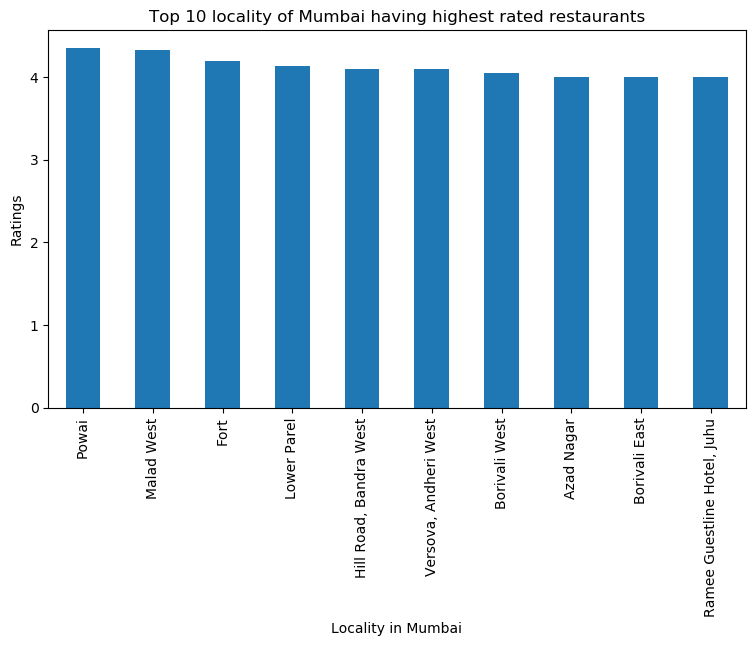

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Top 10 locality of Mumbai having highest rated restaurants')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Locality in Mumbai')
#On y-axis
plt.ylabel('Ratings')
#displays the plot
plt.show()

=> "Powai" and "Malad West" are the localities with most high-rated restaurants

Worst rated Restaurants in Mumbai

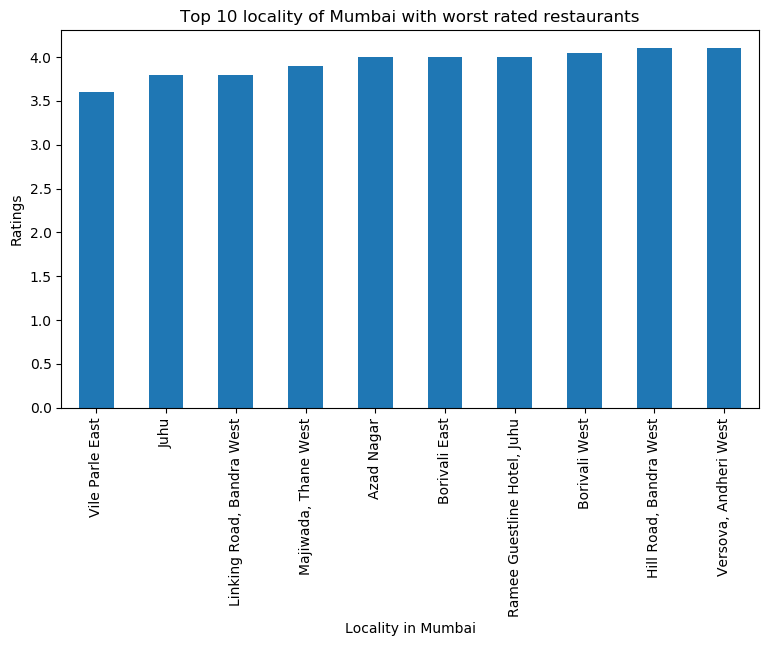

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Top 10 locality of Mumbai with worst rated restaurants')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Locality in Mumbai')
#On y-axis
plt.ylabel('Ratings')

#displays the plot
plt.show()

=> Worst-rated restaurants are located in "Vile Parle"

Highest restaurant availability in Mumbai

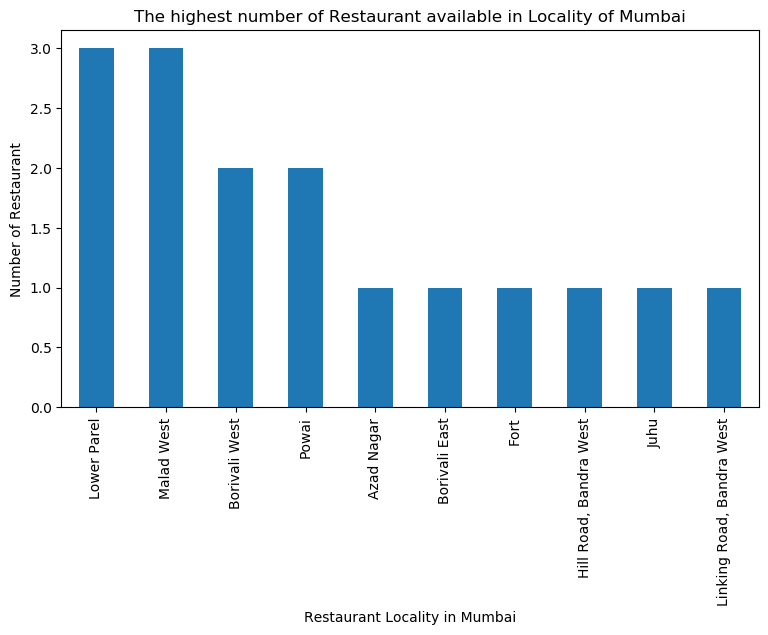

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Mumbai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in Mumbai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

=> "Lower Parel" and "Malad West" are the topmost regions having highest number of restaurants

Lowest Number of Restaurants

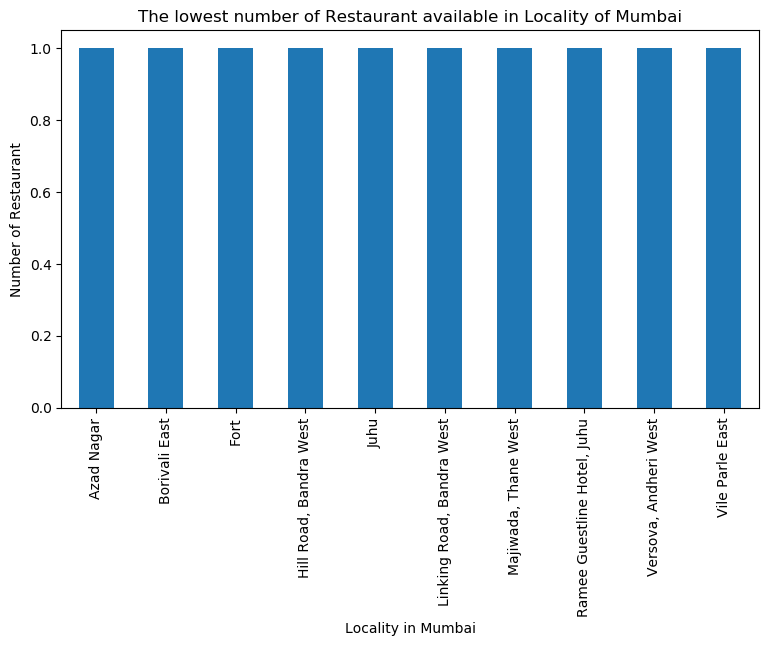

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Mumbai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Locality in Mumbai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

=> "Azad Nagar" has the least number of restaurants

The Cuisine that is most prevalent in a lot of areas in Mumbai is "Italian". Finding best places for getting Italian cuisines with grouping based on locality 

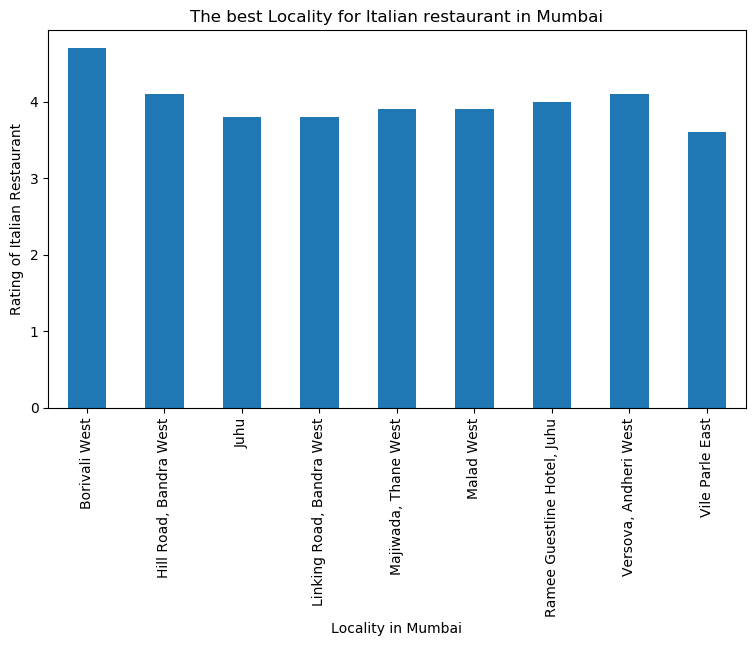

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Italian restaurant in Mumbai')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.contains('Italian')].groupby('Locality')['Aggregate rating'].mean().plot(kind='bar')
plt.xlabel('Locality in Mumbai')
#On y-axis
plt.ylabel('Rating of Italian Restaurant')
9
#displays the plot
plt.show()

In [44]:
df_Res[df_Res['Cuisines'].str.contains('Italian')]

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083,1
5,Tea Villa Cafe,"Hill Road, Bandra West",72.833984,19.055831,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.1,Very Good,2040,2
6,Grandmama's Cafe,Juhu,72.827808,19.091458,"Continental, Italian",3.8,Good,617,2
7,Mumbai Vibe,"Linking Road, Bandra West",72.832658,19.065838,"Cafe, Continental, North Indian, Italian, Chin...",3.8,Good,146,2
11,Tea Villa Cafe,"Majiwada, Thane West",72.972281,19.207222,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",3.9,Good,317,3
14,The English Department Bar & Diner,Malad West,72.836721,19.176269,"Italian, Continental, Mexican, Japanese, Ameri...",3.9,Good,885,1
17,R' ADDA,"Ramee Guestline Hotel, Juhu",72.825451,19.109300,"Street Food, Burger, Desserts, Italian, Pizza,...",4.0,Very Good,536,2
18,Tea Villa Cafe,"Versova, Andheri West",72.813074,19.131141,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.1,Very Good,1295,2
19,Tea Villa Cafe,Vile Parle East,72.846749,19.103249,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",3.6,Good,1515,2


=> "Borivali West" has the best rated Italian restaurant in Mumbai named "The Fusion Kitchen"

DATA TRANSFORMATION

In [62]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [63]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Azad Nagar,19.126630,72.829976,1,Pizza,4.000000,Very Good,5145
1,Borivali East,19.221315,72.862381,1,Asian,4.000000,Very Good,156
2,Borivali West,19.239203,72.845135,2,"Healthy Food, American, Burger, Salad, North I...",4.050000,"Average, Excellent",2253
3,Fort,18.927584,72.832585,1,"Fast Food, Beverages, Desserts",4.200000,Very Good,1606
4,"Hill Road, Bandra West",19.055831,72.833984,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.100000,Very Good,2040
5,Juhu,19.091458,72.827808,1,"Continental, Italian",3.800000,Good,617
6,"Linking Road, Bandra West",19.065838,72.832658,1,"Cafe, Continental, North Indian, Italian, Chin...",3.800000,Good,146
7,Lower Parel,18.997268,72.826135,3,"Bakery, Desserts, Cafe, Modern Indian, North I...",4.133333,"Good, Very Good",6686
8,"Majiwada, Thane West",19.207222,72.972281,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",3.900000,Good,317
9,Malad West,19.178630,72.835876,3,"Pizza, American, Burger, Fast Food, Italian, C...",4.333333,"Excellent, Good",3960


Define Foursquare Credentials and Version

In [64]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'AOYQFO421MY0XQEREL4TKAGVT4HI3KBKFPAEMRBKNCBEKQUA' # Foursquare ID
CLIENT_SECRET = '22YHD01FUEWGYTFCK1LEQSRV5OKQVZI5OLISRUMJRZJIXHWA' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AOYQFO421MY0XQEREL4TKAGVT4HI3KBKFPAEMRBKNCBEKQUA
CLIENT_SECRET:22YHD01FUEWGYTFCK1LEQSRV5OKQVZI5OLISRUMJRZJIXHWA


Function for all the Locality in Mumbai

In [65]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Finding Venues in Mumbai

In [66]:
# find the venues in all New Delhi Locality
mumbai_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Azad Nagar
Borivali East
Borivali West
Fort
Hill Road, Bandra West
Juhu
Linking Road, Bandra West
Lower Parel
Majiwada, Thane West
Malad West
Powai
Ramee Guestline Hotel, Juhu
Versova, Andheri West
Vile Parle East


In [67]:
mumbai_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Azad Nagar,19.12663,72.829976,Joey's Pizza,19.126762,72.830001,Pizza Place
1,Azad Nagar,19.12663,72.829976,Manish Nagar,19.127750,72.827595,Residential Building (Apartment / Condo)
2,Azad Nagar,19.12663,72.829976,Tirumala Store,19.128816,72.827619,Women's Store
3,Azad Nagar,19.12663,72.829976,Living Liquidz,19.130882,72.831212,Liquor Store
4,Azad Nagar,19.12663,72.829976,48 fitness,19.130918,72.831286,Gym / Fitness Center


In [68]:
mumbai_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Azad Nagar,8,8,8,8,8,8
Borivali East,11,11,11,11,11,11
Borivali West,10,10,10,10,10,10
Fort,32,32,32,32,32,32
"Hill Road, Bandra West",34,34,34,34,34,34
Juhu,23,23,23,23,23,23
"Linking Road, Bandra West",37,37,37,37,37,37
Lower Parel,58,58,58,58,58,58
"Majiwada, Thane West",37,37,37,37,37,37


In [69]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 113 uniques categories.


In [70]:
## Analyze Each Locality

# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
mumbai_onehot['Locality'] = mumbai_venues['Locality'] 

# move Locality column to the first column
column_list = mumbai_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
mumbai_onehot = mumbai_onehot[column_list]

mumbai_onehot.head()

,Locality,Airport,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Australian Restaurant,Auto Dealership,BBQ Joint,Bakery,...,Spa,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Azad Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Azad Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Azad Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Azad Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Azad Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
mumbai_grouped = mumbai_onehot.groupby('Locality').mean().reset_index()
mumbai_grouped

,Locality,Airport,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Australian Restaurant,Auto Dealership,BBQ Joint,Bakery,...,Spa,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Azad Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
1,Borivali East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Borivali West,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Fort,0.000000,0.000000,0.000000,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Hill Road, Bandra West",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,...,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412
5,Juhu,0.043478,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,...,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Linking Road, Bandra West",0.000000,0.000000,0.054054,0.027027,0.054054,0.000000,0.000000,0.000000,0.027027,...,0.027027,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Lower Parel,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.017241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000
8,"Majiwada, Thane West",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000
9,Malad West,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.035714,0.000000


In [72]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in mumbai_grouped['Locality']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Azad Nagar----
                  venue  freq
0         Women's Store  0.12
1     Indian Restaurant  0.12
2           Pizza Place  0.12
3  Gym / Fitness Center  0.12
4          Liquor Store  0.12


----Borivali East----
                      venue  freq
0         Indian Restaurant  0.27
1             Shopping Mall  0.09
2  Bike Rental / Bike Share  0.09
3                      Café  0.09
4               Bus Station  0.09


----Borivali West----
                venue  freq
0                Café   0.3
1          Restaurant   0.2
2   Convenience Store   0.1
3  Italian Restaurant   0.1
4        Dessert Shop   0.1


----Fort----
               venue  freq
0               Café  0.16
1                Bar  0.06
2  Indian Restaurant  0.06
3     Breakfast Spot  0.06
4              Hotel  0.03


----Hill Road, Bandra West----
                venue  freq
0   Indian Restaurant  0.21
1                Café  0.09
2         Snack Place  0.06
3  Chinese Restaurant  0.06
4        Gourmet Shop  0.06


-

In [73]:
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = mumbai_grouped['Locality']

for ind in np.arange(mumbai_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azad Nagar,Women's Store,Chinese Restaurant,Residential Building (Apartment / Condo),Liquor Store,Pizza Place,Electronics Store,Indian Restaurant,Gym / Fitness Center,Creperie,Dumpling Restaurant
1,Borivali East,Indian Restaurant,Bike Rental / Bike Share,Auto Dealership,Shopping Mall,Lighthouse,Garden Center,Café,Bus Station,Department Store,Dessert Shop
2,Borivali West,Café,Restaurant,Convenience Store,Italian Restaurant,Dessert Shop,Snack Place,Lounge,Electronics Store,Cosmetics Shop,Creperie
3,Fort,Café,Breakfast Spot,Indian Restaurant,Bar,Chinese Restaurant,Brewery,Pub,Pizza Place,Nightclub,Fast Food Restaurant
4,"Hill Road, Bandra West",Indian Restaurant,Café,Chinese Restaurant,Gourmet Shop,Snack Place,Coffee Shop,Fried Chicken Joint,Men's Store,Bookstore,Clothing Store
5,Juhu,Hotel,Clothing Store,Restaurant,Airport,Nightclub,Australian Restaurant,Indian Restaurant,Gym,Spa,Diner
6,"Linking Road, Bandra West",Indian Restaurant,Bar,Dessert Shop,Seafood Restaurant,Arcade,Asian Restaurant,Lounge,Café,Cocktail Bar,Cupcake Shop
7,Lower Parel,Café,Indian Restaurant,Clothing Store,Shopping Mall,Pizza Place,Pub,Asian Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant
8,"Majiwada, Thane West",Clothing Store,Indian Restaurant,Fast Food Restaurant,Donut Shop,Italian Restaurant,Nightclub,Chinese Restaurant,Multiplex,Café,Department Store
9,Malad West,Coffee Shop,Gym / Fitness Center,Lounge,Fast Food Restaurant,Café,Department Store,Chinese Restaurant,Dumpling Restaurant,Dessert Shop,Restaurant


In [75]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

mumbai_clustering = mumbai_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(14,)

In [76]:
# add clustering labels
mumbai_merged = df_final.head(239)
mumbai_merged['Cluster Labels'] = kmeans.labels_

mumbai_merged =mumbai_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

mumbai_merged.head()

C:\Users\Administrator\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azad Nagar,19.126630,72.829976,1,Pizza,4.00,Very Good,5145,4,Women's Store,Chinese Restaurant,Residential Building (Apartment / Condo),Liquor Store,Pizza Place,Electronics Store,Indian Restaurant,Gym / Fitness Center,Creperie,Dumpling Restaurant
1,Borivali East,19.221315,72.862381,1,Asian,4.00,Very Good,156,0,Indian Restaurant,Bike Rental / Bike Share,Auto Dealership,Shopping Mall,Lighthouse,Garden Center,Café,Bus Station,Department Store,Dessert Shop
2,Borivali West,19.239203,72.845135,2,"Healthy Food, American, Burger, Salad, North I...",4.05,"Average, Excellent",2253,3,Café,Restaurant,Convenience Store,Italian Restaurant,Dessert Shop,Snack Place,Lounge,Electronics Store,Cosmetics Shop,Creperie
3,Fort,18.927584,72.832585,1,"Fast Food, Beverages, Desserts",4.20,Very Good,1606,2,Café,Breakfast Spot,Indian Restaurant,Bar,Chinese Restaurant,Brewery,Pub,Pizza Place,Nightclub,Fast Food Restaurant
4,"Hill Road, Bandra West",19.055831,72.833984,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.10,Very Good,2040,2,Indian Restaurant,Café,Chinese Restaurant,Gourmet Shop,Snack Place,Coffee Shop,Fried Chicken Joint,Men's Store,Bookstore,Clothing Store


In [77]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Lat'],mumbai_merged['Lng'], mumbai_merged['Locality'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

CLUSTER EXAMINATION

In [78]:
## Cluster 1
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,19.221315,4.0,Very Good,156,0,Indian Restaurant,Bike Rental / Bike Share,Auto Dealership,Shopping Mall,Lighthouse,Garden Center,Café,Bus Station,Department Store,Dessert Shop


In [79]:
## Cluster 2
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,19.103249,3.6,Good,1515,1,Tea Room,Fast Food Restaurant,Maharashtrian Restaurant,Martial Arts Dojo,Juice Bar,Diner,Snack Place,Indian Restaurant,Chinese Restaurant,Multiplex


In [80]:
## Cluster 3
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,18.927584,4.200000,Very Good,1606,2,Café,Breakfast Spot,Indian Restaurant,Bar,Chinese Restaurant,Brewery,Pub,Pizza Place,Nightclub,Fast Food Restaurant
4,19.055831,4.100000,Very Good,2040,2,Indian Restaurant,Café,Chinese Restaurant,Gourmet Shop,Snack Place,Coffee Shop,Fried Chicken Joint,Men's Store,Bookstore,Clothing Store
5,19.091458,3.800000,Good,617,2,Hotel,Clothing Store,Restaurant,Airport,Nightclub,Australian Restaurant,Indian Restaurant,Gym,Spa,Diner
6,19.065838,3.800000,Good,146,2,Indian Restaurant,Bar,Dessert Shop,Seafood Restaurant,Arcade,Asian Restaurant,Lounge,Café,Cocktail Bar,Cupcake Shop
7,18.997268,4.133333,"Good, Very Good",6686,2,Café,Indian Restaurant,Clothing Store,Shopping Mall,Pizza Place,Pub,Asian Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant
8,19.207222,3.900000,Good,317,2,Clothing Store,Indian Restaurant,Fast Food Restaurant,Donut Shop,Italian Restaurant,Nightclub,Chinese Restaurant,Multiplex,Café,Department Store
9,19.178630,4.333333,"Excellent, Good",3960,2,Coffee Shop,Gym / Fitness Center,Lounge,Fast Food Restaurant,Café,Department Store,Chinese Restaurant,Dumpling Restaurant,Dessert Shop,Restaurant
10,19.121041,4.350000,"Excellent, Good",3425,2,Indian Restaurant,Café,Bar,Clothing Store,Restaurant,Chinese Restaurant,North Indian Restaurant,Italian Restaurant,Department Store,Coffee Shop
11,19.109300,4.000000,Very Good,536,2,Chinese Restaurant,Café,Bar,Indian Restaurant,Coffee Shop,Cocktail Bar,Asian Restaurant,Hotel,Lounge,Hotel Bar


In [81]:
## Cluster 4
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,19.239203,4.05,"Average, Excellent",2253,3,Café,Restaurant,Convenience Store,Italian Restaurant,Dessert Shop,Snack Place,Lounge,Electronics Store,Cosmetics Shop,Creperie
12,19.131141,4.10,Very Good,1295,3,Café,Ice Cream Shop,Bar,Seafood Restaurant,Creperie,Dessert Shop,Pizza Place,Diner,Recreation Center,Boutique


In [82]:
## Cluster 5
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19.12663,4.0,Very Good,5145,4,Women's Store,Chinese Restaurant,Residential Building (Apartment / Condo),Liquor Store,Pizza Place,Electronics Store,Indian Restaurant,Gym / Fitness Center,Creperie,Dumpling Restaurant


CONCLUSION

=> "Powai" and "Malad West" are the localities with most high-rated restaurants<br>
=> Worst-rated restaurants are located in "Vile Parle"<br>
=> "Lower Parel" and "Malad West" are the topmost regions having highest number of restaurants
<br><br>
=>"Borivali West" and "Hill Road, Bandra West" are the best locations for getting Italian cuisine restaurants in Mumbai.<br>
=>"Borivali West" has the best rated Italian restaurant in Mumbai named "The Fusion Kitchen"<br>
<br><br><br>
=> CLUSTER 1 is best suited for Indian restaurants<br>
=> CLUSTER 2 is best suited for Tea rooms<br>
=> CLUSTER 3 is best suited for Cafes<br>
=> CLUSTER 4 is best suited for Cafes<br>
=> CLUSTER 5 is best suited for Chinese restaurants<br>
